In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from skylark import skylark_root

data_dir = skylark_root / "data"
figure_dir = data_dir / "figures" / "baseline_plots"
figure_dir.mkdir(exist_ok=True, parents=True)

plt.style.use("seaborn-colorblind")
plt.set_cmap("plasma")

data = []
data.append(dict(
    fig_idx=0,
    src_provider='gcp',
    src_region='europe-north1',
    dst_provider='gcp',
    dst_region='us-west4',
    gcp_cloudtransfer_time=105,
    skylark_overlay_time=57.4,
    skylark_random_time=12.4,
))

data.append(dict(
    fig_idx=0,
    src_provider='aws',
    src_region='ap-northeast-2',
    dst_provider='gcp',
    dst_region='us-central1',
    gcp_cloudtransfer_time=308,
    skylark_overlay_time=61.4,
    skylark_random_time=16.3,
))

data.append(dict(
    fig_idx=0,
    src_provider='aws',
    src_region='us-east-1',
    dst_provider='gcp',
    dst_region='us-west4',
    gcp_cloudtransfer_time=284,
    skylark_overlay_time=55.2,
    skylark_random_time=21.1,
))

data.append(dict(
    fig_idx=1,
    src_provider='aws',
    src_region='ap-northeast-2',
    dst_provider='gcp',
    dst_region='us-central1',
    gcp_cloudtransfer_gbps=1.89,
    skylark_overlay_gbps=9.07,
    skylark_random_gbps=35.1,
))

data.append(dict(
    fig_idx=1,
    src_provider='gcp',
    src_region='europe-north1',
    dst_provider='gcp',
    dst_region='us-west4',
    gcp_cloudtransfer_gbps=5.57,
    skylark_overlay_gbps=9.71,
    skylark_random_gbps=46.1,
))

data.append(dict(
    fig_idx=1,
    src_provider='aws',
    src_region='us-east-1',
    dst_provider='gcp',
    dst_region='us-west4',
    gcp_cloudtransfer_gbps=2.05,
    skylark_overlay_gbps=10.1,
    skylark_random_gbps=27.4,
))

data.append(dict(
    fig_idx=2,
    src_provider='aws',
    src_region='us-east-1',
    dst_provider='aws',
    dst_region='us-west-2',
    aws_datasync_gbps=3.80,
    skylark_overlay_gbps=10.1,
    skylark_random_gbps=17.1,
))

data.append(dict(
    fig_idx=2,
    src_provider='gcp',
    src_region='europe-north1',
    dst_provider='gcp',
    dst_region='us-west4',
    gcp_cloudtransfer_gbps=5.57,
    skylark_overlay_gbps=9.71,
    skylark_random_gbps=46.1,
))

data.append(dict(
    fig_idx=3,
    src_provider='aws',
    src_region='ap-northeast-2',
    dst_provider='gcp',
    dst_region='us-central1',
    gcp_cloudtransfer_gbps=1.89,
    skylark_overlay_gbps=9.07,
    skylark_random_gbps=35.1,
))

data.append(dict(
    fig_idx=0,
    src_provider='azure',
    src_region='koreacentral',
    dst_provider='gcp',
    dst_region='na-northeast2',
    gcp_cloudtransfer_gbps=2.58,
    skylark_overlay_gbps=8.76,
    skylark_random_gbps=46.1,
    gcp_cloudtransfer_time=70 * 8 / 2.58,
    skylark_overlay_time=70 * 8 / 8.76,
    skylark_random_time=70 * 8 / 46.1,

))

data.append(dict(
    fig_idx=3,
    src_provider='aws',
    src_region='us-east-1',
    dst_provider='gcp',
    dst_region='us-west4a',
    gcp_cloudtransfer_gbps=2.05,
    skylark_overlay_gbps=10.1,
    skylark_random_gbps=27.4,
))

df = pd.DataFrame(data)

# normalize source provider (aws => AWS, azure => Azure, gcp => GCP)
map_provider = lambda x: {'aws': 'AWS', 'azure': 'Azure', 'gcp': 'GCP'}[x]
df['src_provider'] = df['src_provider'].map(map_provider)
df['dst_provider'] = df['dst_provider'].map(map_provider)
bar_label = lambda x: f"{x['src_provider']} {x['src_region']}\nto {x['dst_provider']} {x['dst_region']}"
df['bar_label'] = df.apply(bar_label, axis=1)

<Figure size 432x288 with 0 Axes>

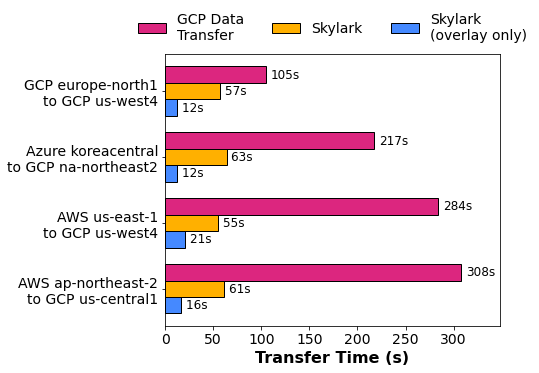

In [75]:
df_fig0 = df[df.fig_idx == 0].sort_values(by=['gcp_cloudtransfer_time'], ascending=False)

# colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# colors = ["#FFB000", "#dc267f", "#648fff", "#785ef0", "#fe6100"]
cblue = "#4589ff"
cpurple = "#785ef0"
cmagenta = "#dc267f"
corange = "#fe6100"
cyellow = "#ffb000"
cgreen = "#24a148"

with plt.style.context({"figure.figsize": (6, 5), "font.size": 14}):
    fig, ax = plt.subplots()
    # ax.set_ylabel("Transfer Regions", fontsize=14, fontweight='bold')
    ax.set_xlabel('Transfer Time (s)', fontsize=16, fontweight='bold')
    fig.set_facecolor('w')

    width = 0.25
    labels = list(reversed(['GCP Data\nTransfer', 'Skylark', 'Skylark\n(overlay only)']))
    for x, (_, row) in enumerate(df_fig0.iterrows()):
        points = reversed([row['gcp_cloudtransfer_time'], row['skylark_overlay_time'], row['skylark_random_time']])
        cmap = reversed([cmagenta, cyellow, cblue])
        for idx, (point, label, color) in (list(enumerate(zip(points, labels, cmap)))):
            if x > 0:
                label = "_nolegend_"
            ax.barh(x + idx * width, point, width, label=label, color=color, edgecolor='black', alpha=1)
            ax.text(point + 5, x + idx * width, f"{int(point)}s".ljust(4), fontsize=12, ha='left', va='center')
    ax.set_xlim(0, df_fig0['gcp_cloudtransfer_time'].max() + 40)
    
    # render bar_label as x-axis label
    ax.set_yticks(np.arange(len(df_fig0)) + width)
    ax.set_yticklabels(df_fig0['bar_label'], rotation=0)
    # show legend over bar chart with 3 columns
    ax.legend(*(
        [ x[i] for i in [2,1,0] ]
        for x in plt.gca().get_legend_handles_labels()
    ), loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, frameon=False)
    fig.show()
    fig.savefig(figure_dir / 'fig0.png', dpi=300, bbox_inches='tight')
    fig.savefig(figure_dir / 'fig0.pdf', dpi=300, bbox_inches='tight')